In [17]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [2]:
df=pd.read_csv(r"D:\Data Science\Python\Projects\Project-6 Singapore Resale\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [3]:
df1=pd.read_csv(r"D:\Data Science\Python\Projects\Project-6 Singapore Resale\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df1.tail(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
37151,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0
37152,2016-12,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,164.0,Multi Generation,1987,70,735000.0


In [4]:
df2=pd.read_csv(r"D:\Data Science\Python\Projects\Project-6 Singapore Resale\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df2.tail(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
180960,2024-06,YISHUN,5 ROOM,509A,YISHUN AVE 4,04 TO 06,113.0,Improved,2018,92 years 11 months,700000.0
180961,2024-06,YISHUN,5 ROOM,502B,YISHUN ST 51,10 TO 12,112.0,Improved,2018,92 years 08 months,738000.0


In [5]:
#taking data from 2015
df3=pd.concat([df1,df2],axis=0)
df3.reset_index(drop=True,inplace=True)
df3.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
218110,2024-06,YISHUN,4 ROOM,426C,YISHUN AVE 11,10 TO 12,92.0,Model A,2015,89 years 10 months,543000.0
218111,2024-06,YISHUN,4 ROOM,758,YISHUN ST 72,10 TO 12,84.0,Simplified,1986,61 years 07 months,528888.0
218112,2024-06,YISHUN,4 ROOM,844,YISHUN ST 81,10 TO 12,104.0,Model A,1988,63 years 07 months,590000.0
218113,2024-06,YISHUN,5 ROOM,509A,YISHUN AVE 4,04 TO 06,113.0,Improved,2018,92 years 11 months,700000.0
218114,2024-06,YISHUN,5 ROOM,502B,YISHUN ST 51,10 TO 12,112.0,Improved,2018,92 years 08 months,738000.0


In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218115 entries, 0 to 218114
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                218115 non-null  object 
 1   town                 218115 non-null  object 
 2   flat_type            218115 non-null  object 
 3   block                218115 non-null  object 
 4   street_name          218115 non-null  object 
 5   storey_range         218115 non-null  object 
 6   floor_area_sqm       218115 non-null  float64
 7   flat_model           218115 non-null  object 
 8   lease_commence_date  218115 non-null  int64  
 9   remaining_lease      218115 non-null  object 
 10  resale_price         218115 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 18.3+ MB


In [7]:
df3.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [8]:
df3["address"]=df3["block"]+" "+df3["street_name"]
df3.tail(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
218113,2024-06,YISHUN,5 ROOM,509A,YISHUN AVE 4,04 TO 06,113.0,Improved,2018,92 years 11 months,700000.0,509A YISHUN AVE 4
218114,2024-06,YISHUN,5 ROOM,502B,YISHUN ST 51,10 TO 12,112.0,Improved,2018,92 years 08 months,738000.0,502B YISHUN ST 51


In [9]:
df4=df3.drop(["block","street_name"],axis=1)
df4.tail(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
218113,2024-06,YISHUN,5 ROOM,04 TO 06,113.0,Improved,2018,92 years 11 months,700000.0,509A YISHUN AVE 4
218114,2024-06,YISHUN,5 ROOM,10 TO 12,112.0,Improved,2018,92 years 08 months,738000.0,502B YISHUN ST 51


In [10]:
#change datetime
df4["month"]=pd.to_datetime(df4["month"],format="%Y-%m")
df4.tail(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
218113,2024-06-01,YISHUN,5 ROOM,04 TO 06,113.0,Improved,2018,92 years 11 months,700000.0,509A YISHUN AVE 4
218114,2024-06-01,YISHUN,5 ROOM,10 TO 12,112.0,Improved,2018,92 years 08 months,738000.0,502B YISHUN ST 51


In [11]:
df4["year"]=df4["month"].dt.year
df4["month"]=df4["month"].dt.month
df4.tail(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
218113,6,YISHUN,5 ROOM,04 TO 06,113.0,Improved,2018,92 years 11 months,700000.0,509A YISHUN AVE 4,2024
218114,6,YISHUN,5 ROOM,10 TO 12,112.0,Improved,2018,92 years 08 months,738000.0,502B YISHUN ST 51,2024


In [12]:
#Encoding categorical data
df4["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [13]:
df4["flat_type"].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [14]:
df4["flat_model"].unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Premium Apartment', 'Maisonette', 'Apartment', 'Model A2',
       'Type S1', 'Type S2', 'Adjoined flat', 'Terrace', 'DBSS',
       'Model A-Maisonette', 'Premium Maisonette', 'Multi Generation',
       'Premium Apartment Loft', 'Improved-Maisonette', '2-room', '3Gen'],
      dtype=object)

In [15]:
df4["town"]=LabelEncoder().fit_transform(df4["town"])
df4["flat_type"]=OrdinalEncoder().fit_transform(df4[["flat_type"]])
df4["flat_model"]=OrdinalEncoder().fit_transform(df4[["flat_model"]])                                                

In [16]:
df4["town"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [17]:
df4["flat_type"].unique()

array([2., 3., 4., 1., 5., 0., 6.])

In [18]:
df4["flat_model"].unique()

array([ 5., 12.,  8., 17., 16., 13.,  7.,  3., 10., 19., 20.,  2., 18.,
        4.,  9., 15., 11., 14.,  6.,  0.,  1.])

In [19]:
df4.tail(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
218113,6,25,4.0,04 TO 06,113.0,5.0,2018,92 years 11 months,700000.0,509A YISHUN AVE 4,2024
218114,6,25,4.0,10 TO 12,112.0,5.0,2018,92 years 08 months,738000.0,502B YISHUN ST 51,2024


In [20]:
#expand=True-->the split elements will expand out into separate columns
df4[["storey_start","storey_end"]]=df4["storey_range"].str.split("TO", expand=True)
df4.tail(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,storey_start,storey_end
218113,6,25,4.0,04 TO 06,113.0,5.0,2018,92 years 11 months,700000.0,509A YISHUN AVE 4,2024,04,06
218114,6,25,4.0,10 TO 12,112.0,5.0,2018,92 years 08 months,738000.0,502B YISHUN ST 51,2024,10,12


In [21]:
df4.drop(["storey_range"],axis=1,inplace=True)
df4.tail(2)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,storey_start,storey_end
218113,6,25,4.0,113.0,5.0,2018,92 years 11 months,700000.0,509A YISHUN AVE 4,2024,04,06
218114,6,25,4.0,112.0,5.0,2018,92 years 08 months,738000.0,502B YISHUN ST 51,2024,10,12


In [22]:
df4["address"].nunique()

9589

In [23]:
df4["address"]=LabelEncoder().fit_transform(df4["address"])

In [25]:
df4["address"].unique()

array([1635, 6596, 1466, ..., 2748, 4883,  566])

In [26]:
df4.tail(2)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,storey_start,storey_end
218113,6,25,4.0,113.0,5.0,2018,92 years 11 months,700000.0,6198,2024,04,06
218114,6,25,4.0,112.0,5.0,2018,92 years 08 months,738000.0,6084,2024,10,12


In [27]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218115 entries, 0 to 218114
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                218115 non-null  int32  
 1   town                 218115 non-null  int32  
 2   flat_type            218115 non-null  float64
 3   floor_area_sqm       218115 non-null  float64
 4   flat_model           218115 non-null  float64
 5   lease_commence_date  218115 non-null  int64  
 6   remaining_lease      218115 non-null  object 
 7   resale_price         218115 non-null  float64
 8   address              218115 non-null  int32  
 9   year                 218115 non-null  int32  
 10  storey_start         218115 non-null  object 
 11  storey_end           218115 non-null  object 
dtypes: float64(4), int32(4), int64(1), object(3)
memory usage: 16.6+ MB


In [29]:
df4["storey_start"]=df4["storey_start"].astype(int)
df4["storey_end"]=df4["storey_end"].astype(int)

In [30]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218115 entries, 0 to 218114
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                218115 non-null  int32  
 1   town                 218115 non-null  int32  
 2   flat_type            218115 non-null  float64
 3   floor_area_sqm       218115 non-null  float64
 4   flat_model           218115 non-null  float64
 5   lease_commence_date  218115 non-null  int64  
 6   remaining_lease      218115 non-null  object 
 7   resale_price         218115 non-null  float64
 8   address              218115 non-null  int32  
 9   year                 218115 non-null  int32  
 10  storey_start         218115 non-null  int32  
 11  storey_end           218115 non-null  int32  
dtypes: float64(4), int32(6), int64(1), object(1)
memory usage: 15.0+ MB


In [40]:
values=[]
for i in df4["remaining_lease"].astype(str):
    j=i.replace("years","")
    k=j.replace("months","")
    l=k.replace("month","")
    m=l.strip()
    n=m.split("  ")
    values.append(n)

In [41]:
df_values=pd.DataFrame(values,columns=["remaining_lease_year","remaining_lease_month"])

In [42]:
df_values["remaining_lease_year"]=df_values["remaining_lease_year"].astype(int)
df_values["remaining_lease_month"]=df_values["remaining_lease_month"].fillna(0).astype(int)

In [43]:
df_values.tail(2)

,remaining_lease_year,remaining_lease_month
218113,92,11
218114,92,8


In [44]:
df4.drop(["remaining_lease"],axis=1,inplace=True)
df4.tail(2)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,address,year,storey_start,storey_end
218113,6,25,4.0,113.0,5.0,2018,700000.0,6198,2024,4,6
218114,6,25,4.0,112.0,5.0,2018,738000.0,6084,2024,10,12


In [45]:
df5=pd.concat([df4,df_values],axis=1)
df5.tail(2)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,address,year,storey_start,storey_end,remaining_lease_year,remaining_lease_month
218113,6,25,4.0,113.0,5.0,2018,700000.0,6198,2024,4,6,92,11
218114,6,25,4.0,112.0,5.0,2018,738000.0,6084,2024,10,12,92,8


In [47]:
df5.columns

Index(['month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'address', 'year',
       'storey_start', 'storey_end', 'remaining_lease_year',
       'remaining_lease_month'],
      dtype='object')

In [48]:
df6=df5[['year','month','town','flat_type', 'floor_area_sqm', 'flat_model','address',
       'storey_start', 'storey_end', 'remaining_lease_year',
       'remaining_lease_month','lease_commence_date', 'resale_price']]
df6.tail(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
218113,2024,6,25,4.0,113.0,5.0,6198,4,6,92,11,2018,700000.0
218114,2024,6,25,4.0,112.0,5.0,6084,10,12,92,8,2018,738000.0


In [49]:
df7=df6.sort_values(by=["year","month"])
df7.tail()

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
218110,2024,6,25,3.0,92.0,8.0,5167,10,12,89,10,2015,543000.0
218111,2024,6,25,3.0,84.0,16.0,8483,10,12,61,7,1986,528888.0
218112,2024,6,25,3.0,104.0,8.0,8986,10,12,63,7,1988,590000.0
218113,2024,6,25,4.0,113.0,5.0,6198,4,6,92,11,2018,700000.0
218114,2024,6,25,4.0,112.0,5.0,6084,10,12,92,8,2018,738000.0


In [50]:
df7.to_csv("ResalePrices.csv",index=False)

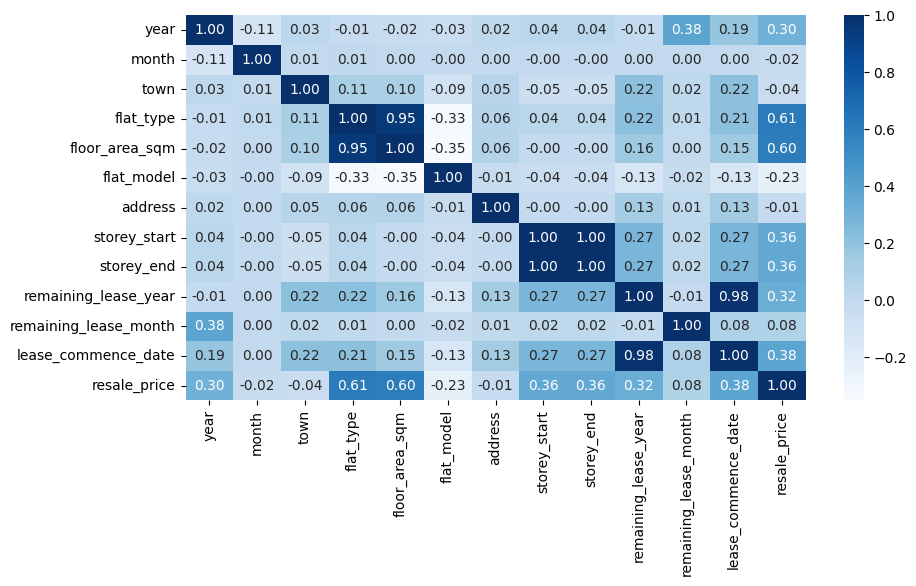

In [41]:
#finding correlation
df_7=pd.read_csv(r"D:\Data Science\Python\Code\ResalePrices.csv")
df8=df_7.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df8, annot=True,cmap="Blues",fmt=".2f")
plt.show()

In [42]:
df_7.duplicated().sum()

312

In [43]:
df9=df_7.drop_duplicates()
df9.reset_index(drop=True,inplace=True)

In [44]:
df9.tail(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
217801,2024,6,25,4.0,113.0,5.0,6198,4,6,92,11,2018,700000.0
217802,2024,6,25,4.0,112.0,5.0,6084,10,12,92,8,2018,738000.0


In [45]:
#removing month and year as correlation is low
df10=df9.drop(columns=["address","month"])
df10.tail(2)

,year,town,flat_type,floor_area_sqm,flat_model,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
217801,2024,25,4.0,113.0,5.0,4,6,92,11,2018,700000.0
217802,2024,25,4.0,112.0,5.0,10,12,92,8,2018,738000.0


In [46]:
#Skewness
def plot(df,column):
    #distplot
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    sns.distplot(df[column])
    plt.title("Distplot for "+column)

    #histogram plot
    plt.subplot(1,3,2)
    sns.histplot(df,x=column,kde=True,bins=30,color="salmon")
    plt.title("Histogram plot for "+column)

    #boxplot
    plt.subplot(1,3,3)
    sns.boxplot(df,x=column)
    plt.title("Box plot for "+column)

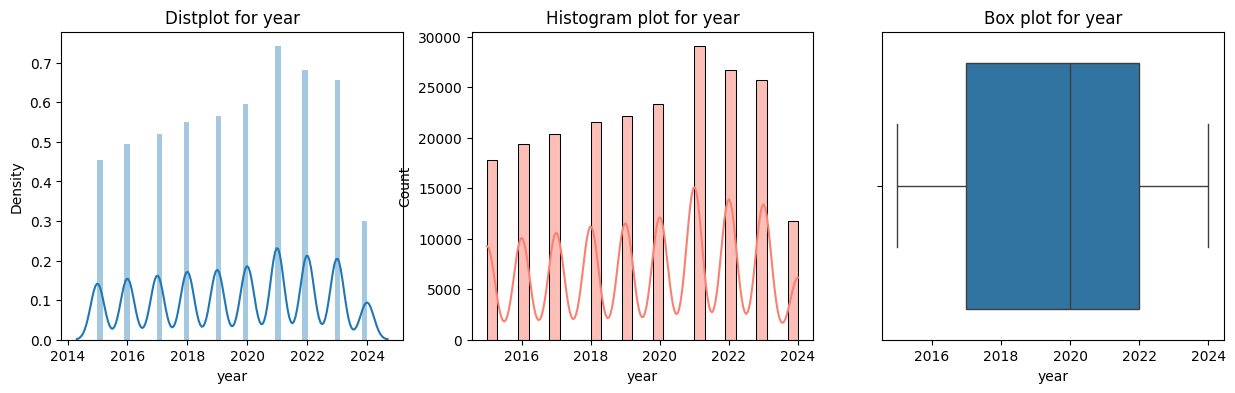

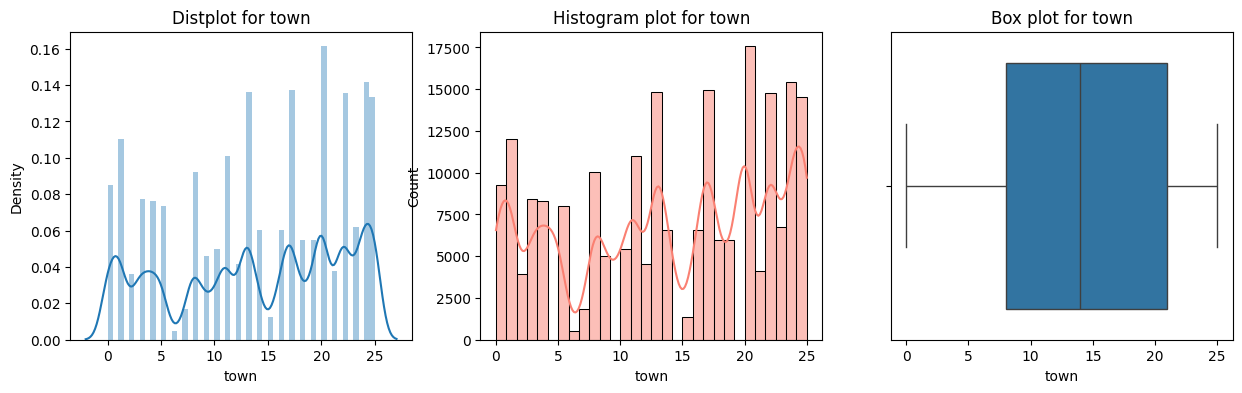

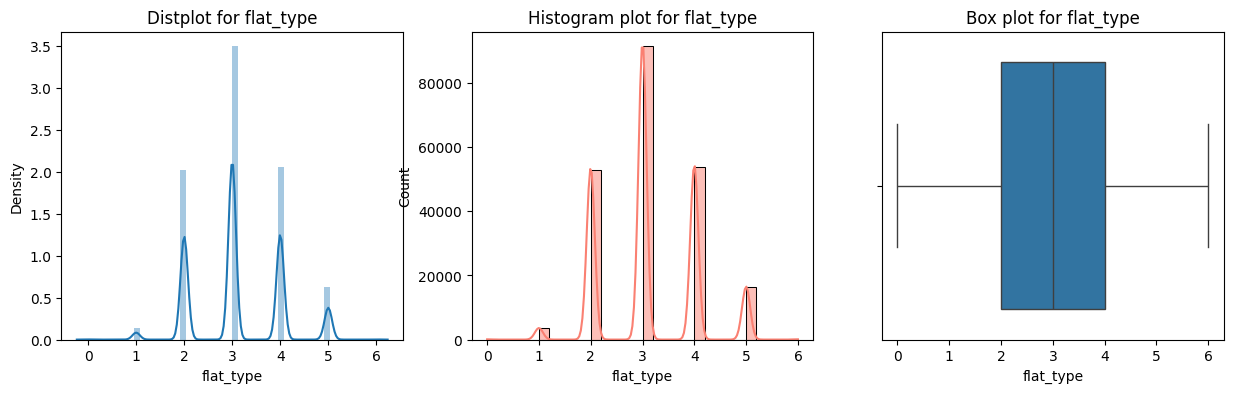

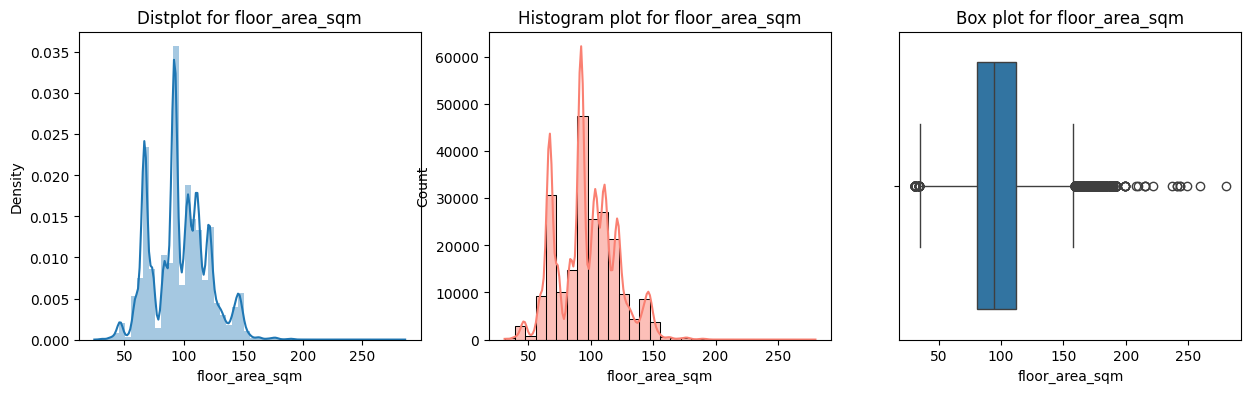

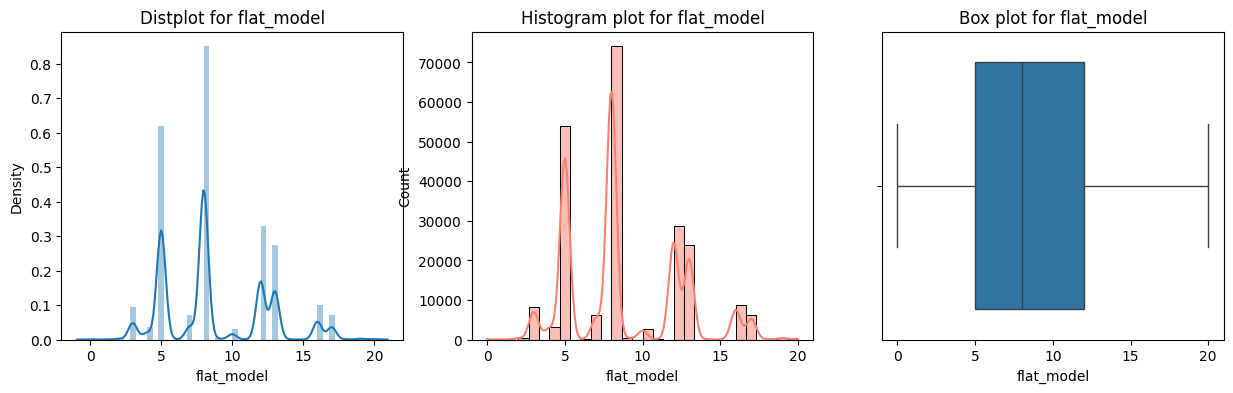

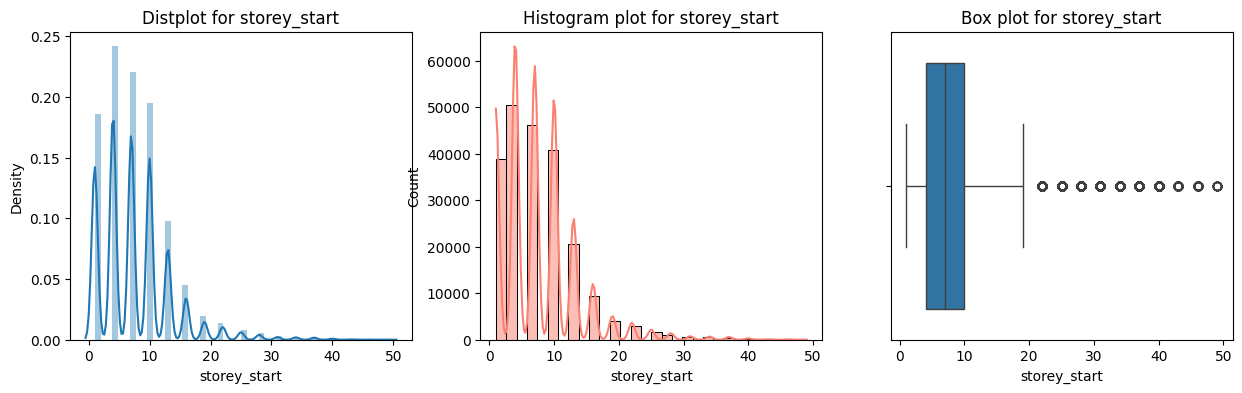

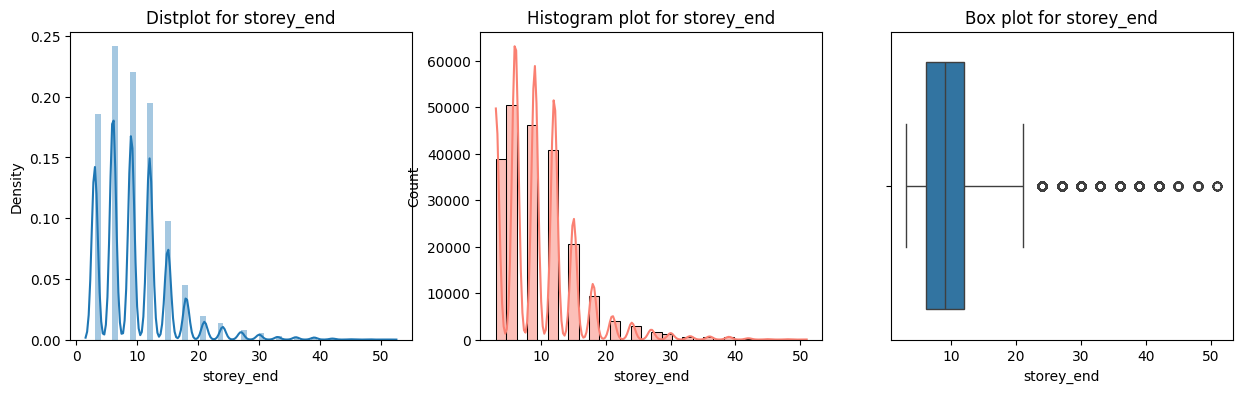

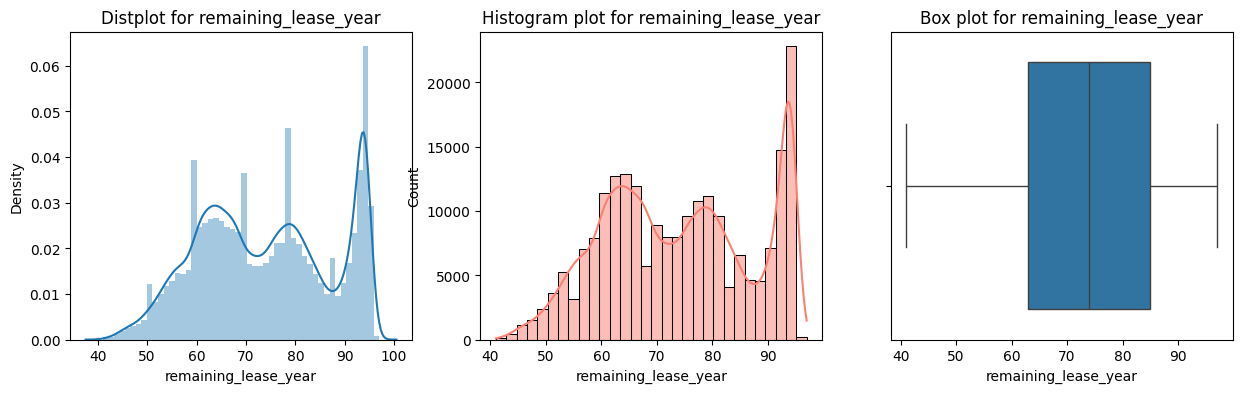

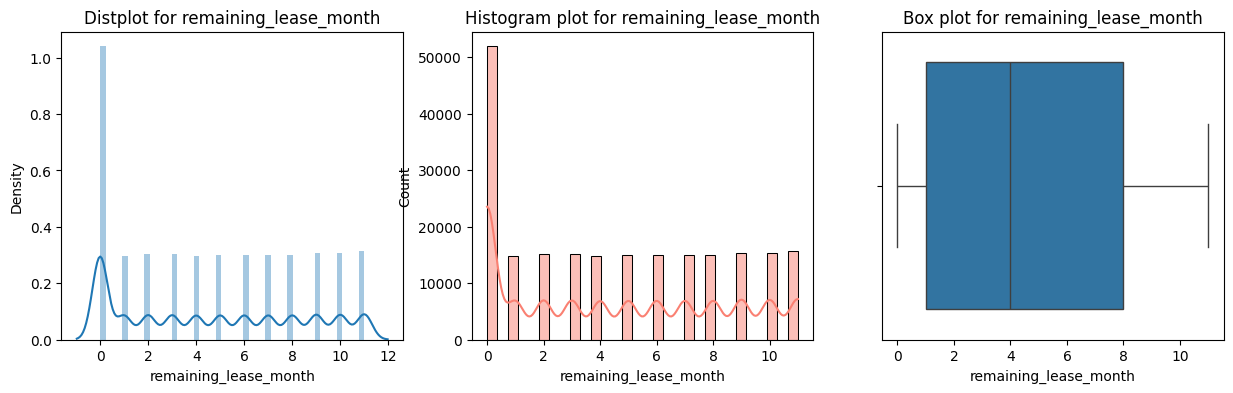

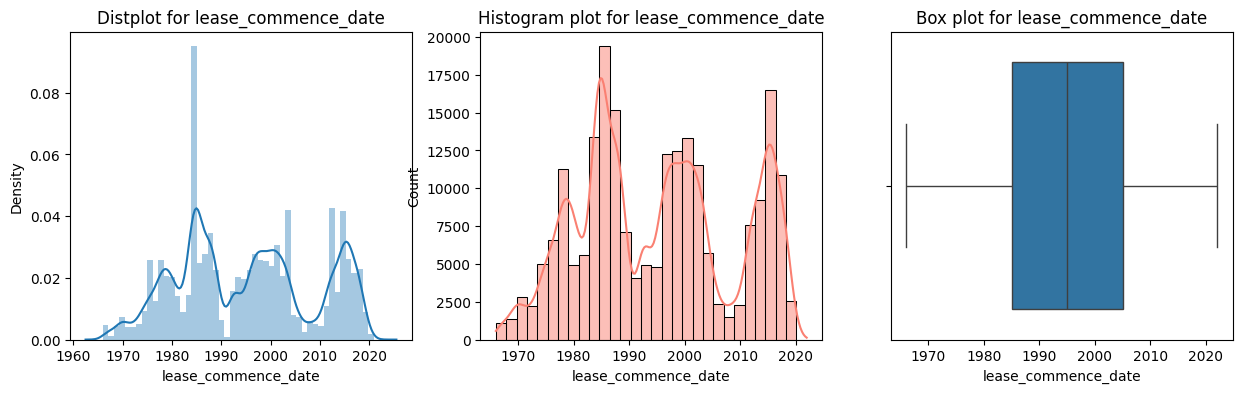

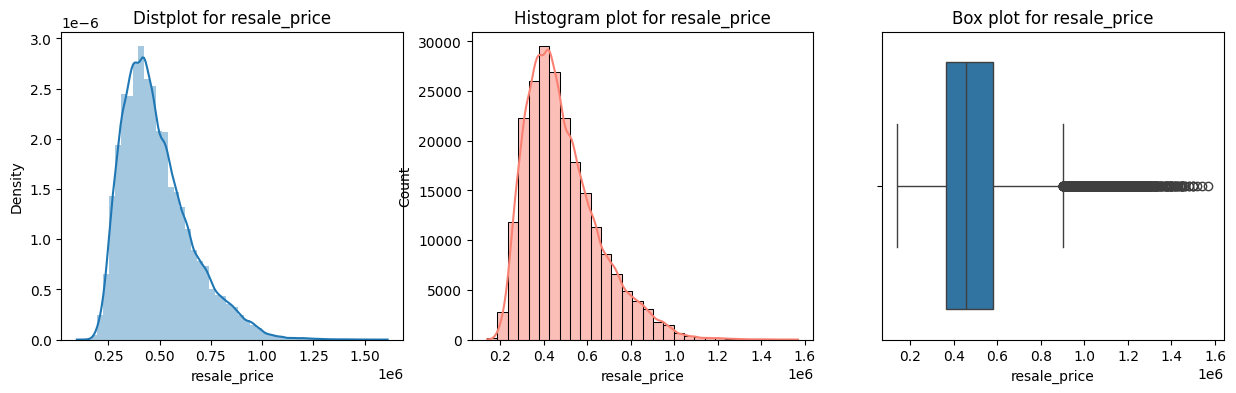

In [47]:
for i in df10.columns:
    plot(df10,i)    

In [48]:
df10.describe().T

,count,mean,std,min,25%,50%,75%,max
year,217803.0,2019.606667,2.683167,2015.0,2017.0,2020.0,2022.0,2024.0
town,217803.0,13.892187,7.956046,0.0,8.0,14.0,21.0,25.0
flat_type,217803.0,3.120907,0.919342,0.0,2.0,3.0,4.0,6.0
floor_area_sqm,217803.0,97.137197,24.058940,31.0,81.0,94.0,112.0,280.0
flat_model,217803.0,8.690693,3.646424,0.0,5.0,8.0,12.0,20.0
storey_start,217803.0,7.656300,5.843696,1.0,4.0,7.0,10.0,49.0
storey_end,217803.0,9.656300,5.843696,3.0,6.0,9.0,12.0,51.0
remaining_lease_year,217803.0,74.098888,13.476884,41.0,63.0,74.0,85.0,97.0
remaining_lease_month,217803.0,4.601062,3.782125,0.0,1.0,4.0,8.0,11.0
lease_commence_date,217803.0,1995.139819,13.682024,1966.0,1985.0,1995.0,2005.0,2022.0


In [49]:
#Taking log transform for resale price, storey start, storey end
df11=df10.copy()
df11["storey_start"]=np.log(df11["storey_start"])
df11["storey_end"]=np.log(df11["storey_end"])
df11["resale_price"]=np.log(df11["resale_price"])

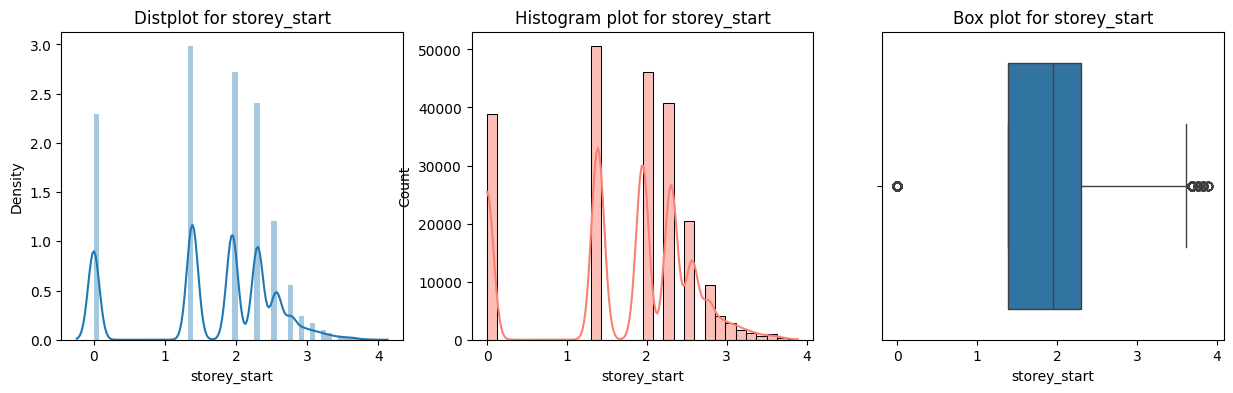

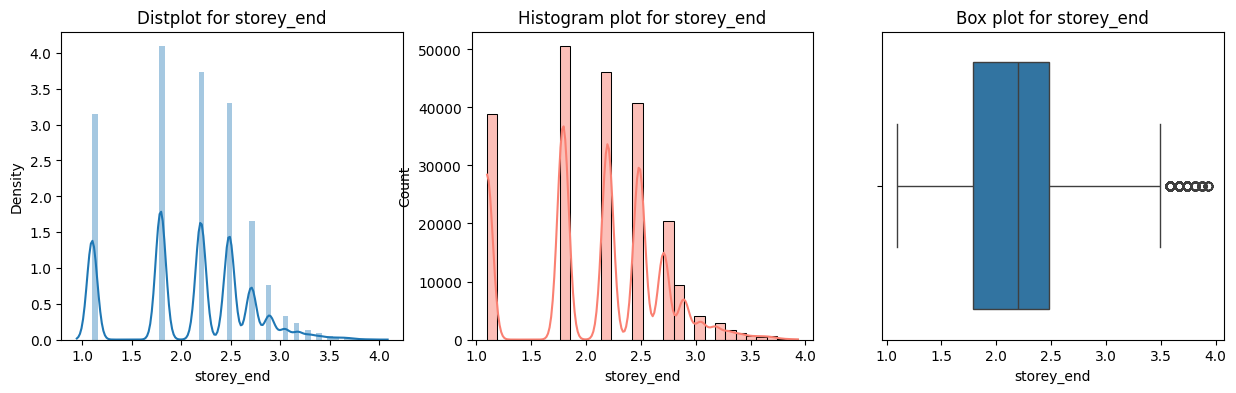

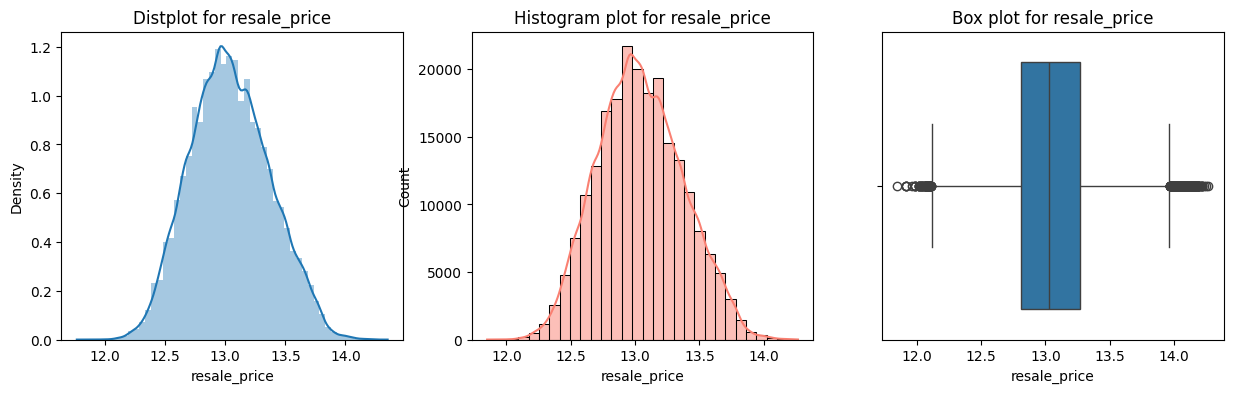

In [50]:
skewed_columns=["storey_start","storey_end","resale_price"]
for i in skewed_columns:
    plot(df11,i)

In [51]:
#handling outliers floor area, storey start, storey end, resale price
df12=df11.copy()

In [52]:
def outlier(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    upper_threshold=q3+(1.5*iqr)
    lower_threshold=q1-(1.5*iqr)
    df[column]=df[column].clip(lower_threshold,upper_threshold)

In [53]:
outlier_columns=["floor_area_sqm","storey_start","storey_end","resale_price"]
for i in outlier_columns:
    outlier(df12,i)

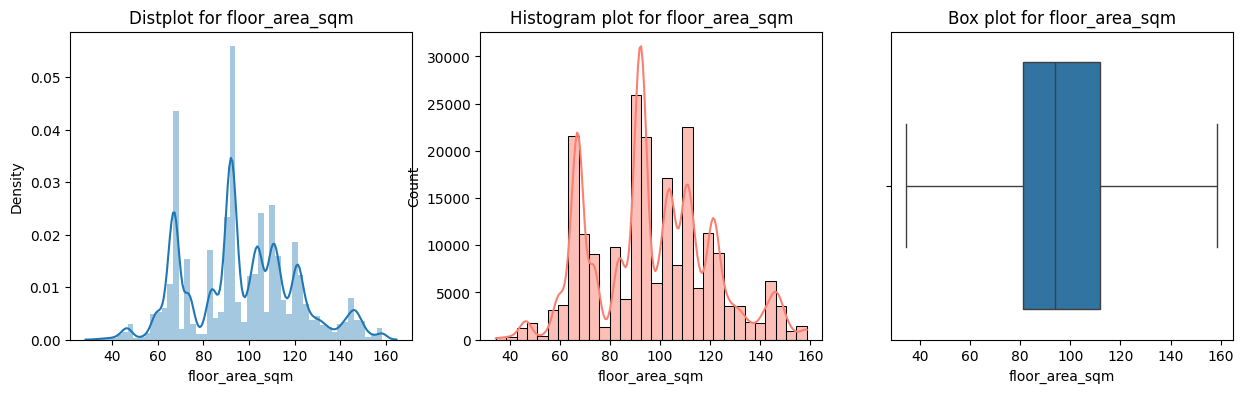

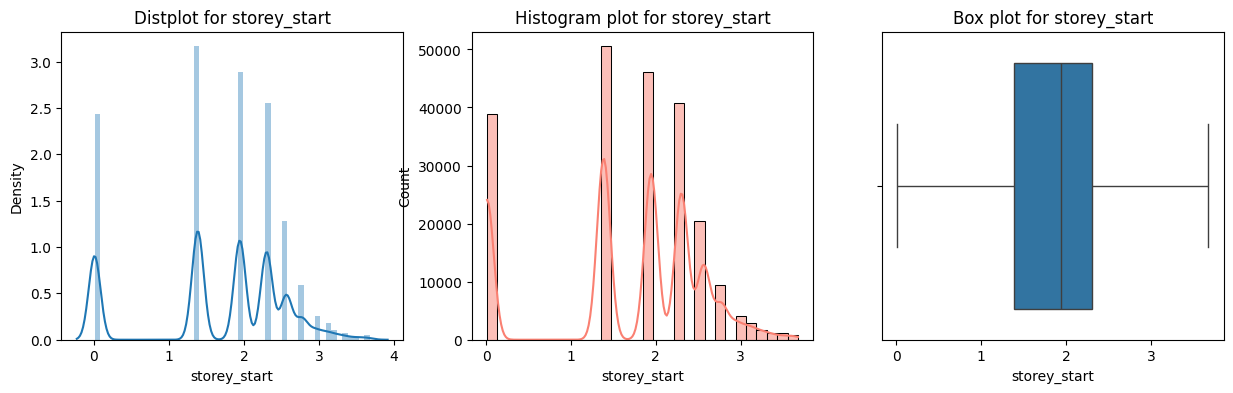

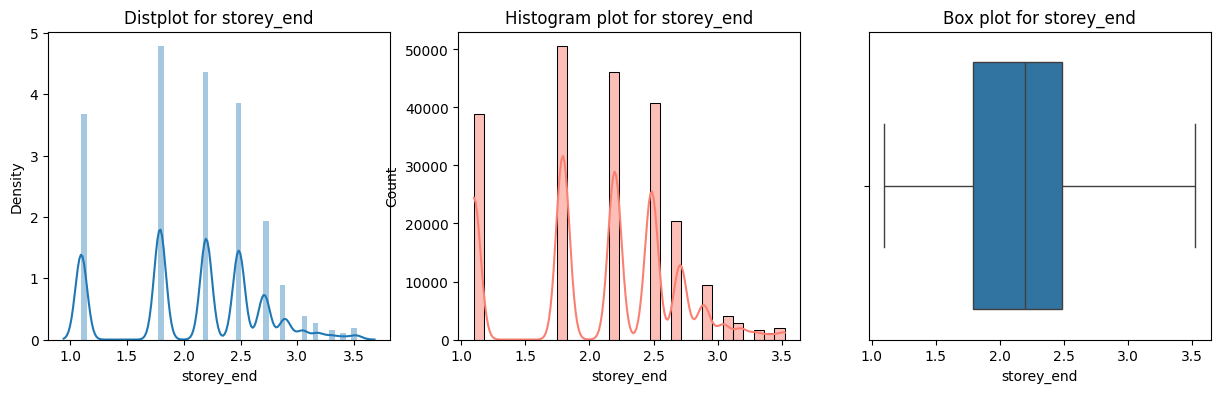

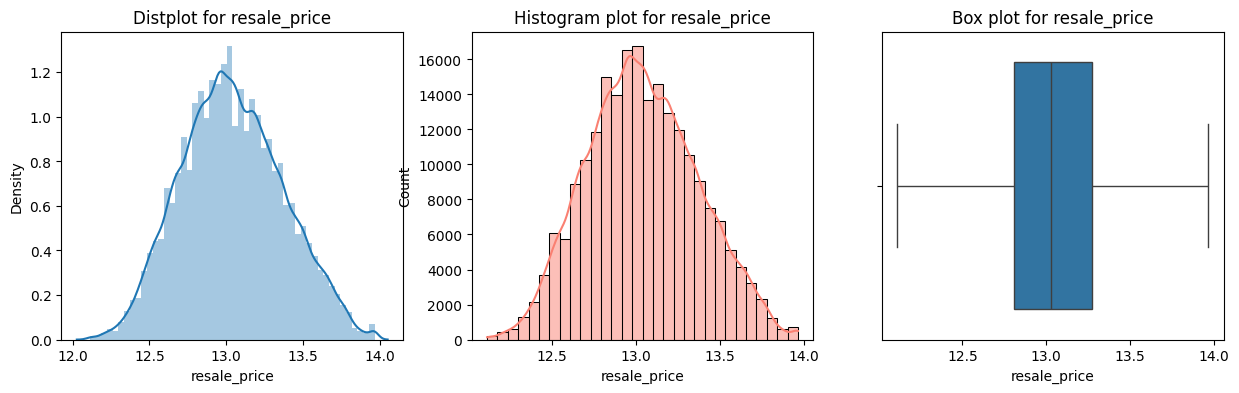

In [54]:
for i in outlier_columns:
    plot(df12,i)

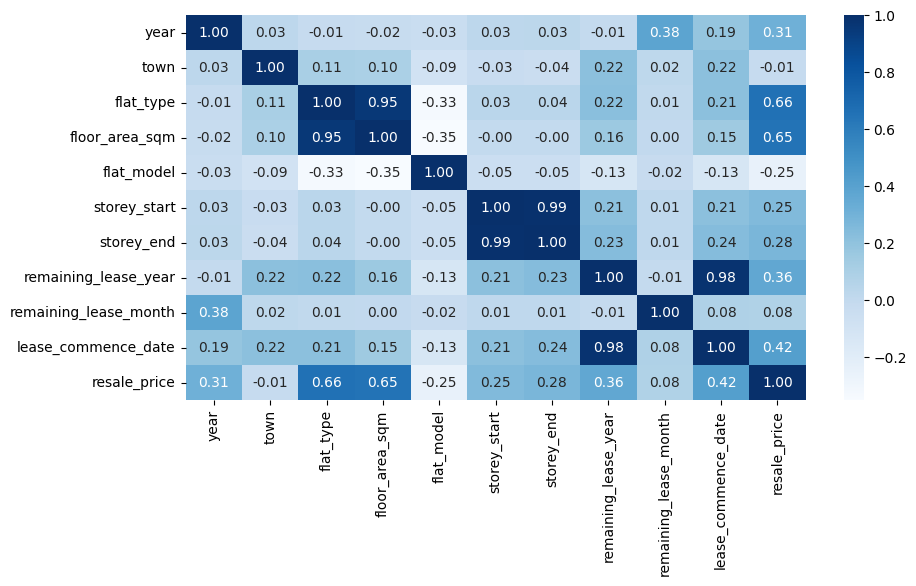

In [55]:
#finding correlation again after reducing skewness and outliers
plt.figure(figsize=(10,5))
sns.heatmap(df12.corr(), annot=True,cmap="Blues",fmt=".2f")
plt.show()

In [56]:
df_final=df12.copy()

In [57]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
year,217803.0,2019.606667,2.683167,2015.000000,2017.000000,2020.000000,2022.000000,2024.000000
town,217803.0,13.892187,7.956046,0.000000,8.000000,14.000000,21.000000,25.000000
flat_type,217803.0,3.120907,0.919342,0.000000,2.000000,3.000000,4.000000,6.000000
floor_area_sqm,217803.0,97.064033,23.825439,34.500000,81.000000,94.000000,112.000000,158.500000
flat_model,217803.0,8.690693,3.646424,0.000000,5.000000,8.000000,12.000000,20.000000
storey_start,217803.0,1.695309,0.920888,0.011858,1.386294,1.945910,2.302585,3.677021
storey_end,217803.0,2.093171,0.601257,1.098612,1.791759,2.197225,2.484907,3.524627
remaining_lease_year,217803.0,74.098888,13.476884,41.000000,63.000000,74.000000,85.000000,97.000000
remaining_lease_month,217803.0,4.601062,3.782125,0.000000,1.000000,4.000000,8.000000,11.000000
lease_commence_date,217803.0,1995.139819,13.682024,1966.000000,1985.000000,1995.000000,2005.000000,2022.000000


### MODEL SELECTION

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [59]:
def model_selection(df,models):

    x= df.drop(columns=["resale_price"], axis=1)
    y= df["resale_price"]
    
    #train test splitting
    x_train,x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)
    model= models().fit(x_train, y_train)
    
    y_pred_train= model.predict(x_train)
    y_pred_test= model.predict(x_test)

    #accuracy score for training data
    mse_train=mean_squared_error(y_train,y_pred_train)
    rmse_train=np.sqrt(mse_train)
    mae_train=mean_absolute_error(y_train,y_pred_train)
    r2_train= r2_score(y_train, y_pred_train)

    #accuracy score for testing data
    mse_test=mean_squared_error(y_test,y_pred_test)
    rmse_test=np.sqrt(mse_test)
    mae_test=mean_absolute_error(y_test,y_pred_test)
    r2_test= r2_score(y_test, y_pred_test)
    
    metrics_train={"Data":"Training Data",
                   "Model":models.__name__,
                   "R2_Score": r2_train,
                    'Mean Absolute Error': mae_train,
                    'Mean Squared Error': mse_train,
                    'Root Mean Squared Error': rmse_train}
    metrics_test={"Data":"Testing Data",
                   "Model":models.__name__,
                   "R2_Score": r2_test,
                    'Mean Absolute Error': mae_test,
                    'Mean Squared Error': mse_test,
                    'Root Mean Squared Error': rmse_test}
    
    
    print(metrics_train)
    print(metrics_test)

In [60]:
model_selection(df_final, LinearRegression)
model_selection(df_final, DecisionTreeRegressor)
model_selection(df_final, RandomForestRegressor)
model_selection(df_final, AdaBoostRegressor)
model_selection(df_final, ExtraTreesRegressor)
model_selection(df_final, GradientBoostingRegressor)
model_selection(df_final, XGBRegressor)

{'Data': 'Training Data', 'Model': 'LinearRegression', 'R2_Score': 0.6757450134347054, 'Mean Absolute Error': 0.14791320410680528, 'Mean Squared Error': 0.03567564970116305, 'Root Mean Squared Error': 0.18887998756131644}
{'Data': 'Testing Data', 'Model': 'LinearRegression', 'R2_Score': 0.6715989879324744, 'Mean Absolute Error': 0.1478950394691884, 'Mean Squared Error': 0.03570811359998264, 'Root Mean Squared Error': 0.18896590591951407}
{'Data': 'Training Data', 'Model': 'DecisionTreeRegressor', 'R2_Score': 0.9962101879054253, 'Mean Absolute Error': 0.007259613097220079, 'Mean Squared Error': 0.00041696817110337613, 'Root Mean Squared Error': 0.020419798507903455}
{'Data': 'Testing Data', 'Model': 'DecisionTreeRegressor', 'R2_Score': 0.9254994131302803, 'Mean Absolute Error': 0.06423803725504429, 'Mean Squared Error': 0.008100691902442505, 'Root Mean Squared Error': 0.09000384382037528}
{'Data': 'Training Data', 'Model': 'RandomForestRegressor', 'R2_Score': 0.9911413322707169, 'Mean A

In [61]:
#Selecting Random Forest 
x= df_final.drop(columns=["resale_price"], axis=1)
y= df_final["resale_price"]
    
#train test splitting
x_train,x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)
model1= RandomForestRegressor().fit(x_train, y_train)
y_pred= model1.predict(x_test)

#accuracy score for testing data
mse_test=mean_squared_error(y_test,y_pred)
rmse_test=np.sqrt(mse_test)
mae_test=mean_absolute_error(y_test,y_pred)
r2_test= r2_score(y_test, y_pred)

metrics_test={"Data":"Testing Data",
                   "Model":RandomForestRegressor.__name__,
                   "R2_Score": r2_test,
                    'Mean Absolute Error': mae_test,
                    'Mean Squared Error': mse_test,
                    'Root Mean Squared Error': rmse_test}  

print(metrics_test)

{'Data': 'Testing Data', 'Model': 'RandomForestRegressor', 'R2_Score': 0.954396169608485, 'Mean Absolute Error': 0.051553539924239535, 'Mean Squared Error': 0.004958653281737523, 'Root Mean Squared Error': 0.07041770574037132}


In [62]:
df_final.iloc[10500]

year                     2015.000000
town                        4.000000
flat_type                   4.000000
floor_area_sqm            115.000000
flat_model                  5.000000
storey_start                3.332205
storey_end                  3.401197
remaining_lease_year       89.000000
remaining_lease_month       0.000000
lease_commence_date      2005.000000
resale_price               13.729953
Name: 10500, dtype: float64

In [63]:
np.exp(13.729953)

918000.3033048381

In [64]:
user_data=np.array([[2015,4,4,115,5,3.332205,3.401197,89,0,2005]])
y_pred= model1.predict(user_data)
y_pred

array([13.72730369])

In [65]:
np.exp(13.72730369)

915571.4547283422

In [67]:
# Saving model using pickle
with open("SGResaleFlatPrices.pkl","wb") as f:
  pickle.dump(model1,f)

In [69]:
with open("SGResaleFlatPrices.pkl","rb") as f1:
    reg_model= pickle.load(f1)

In [70]:
user_data = np.array([[2015,8,5,4.955827,3,1.386294,1.791759,73,0,1990]])
y_pred= reg_model.predict(user_data)
y_pred

array([12.31812066])

In [71]:
np.exp(12.31812066)

223713.31334727345